# Logistic Regression

# 1. Logistic Regression: Introduction

## 1.1 What is Logistic Regression?

Logistic regression is a type of regression used when the output we’re trying to predict is categorical, typically binary, such as:

- Spam or Not Spam  
- Tumour: Benign or Malignant  
- Customer will Buy or Not Buy  
- Transaction is Fraudulent or Not  

Unlike linear regression, which predicts continuous values, logistic regression predicts the **probability** that an instance belongs to a particular class. This probability is then turned into a class label using a threshold (usually 0.5).



## 1.2 Real-Life Scenario: Email Spam Filter

Imagine you're building a spam filter. You extract features from an email:

| Feature                  | Value |
|--------------------------|-------|
| Contains “Free”          | 1     |
| Number of links          | 3     |
| Length of email          | 450   |
| Sender in contact list   | 0     |

You want your model to answer:

**“What is the probability that this email is spam?”**

Logistic regression models this as:

$$
P(\text{spam}) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

If the model outputs 0.87 (87%), and our threshold is 0.5, we classify it as spam.



## 1.3 How is Logistic Regression Different from Linear Regression?

|                        | Linear Regression              | Logistic Regression                          |
|------------------------|--------------------------------|----------------------------------------------|
| Target                 | Continuous (e.g. price)        | Binary (e.g. spam or not spam)               |
| Output                 | Any real number                | A probability between 0 and 1                |
| Function               | $w \cdot x + b$                | $\sigma(w \cdot x + b)$ (sigmoid)            |
| Loss Function          | Mean Squared Error             | Binary Cross-Entropy                         |



## 1.4 Sigmoid: Turning Scores into Probabilities

To convert model output into a probability, we use the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- For very negative $z$, output ≈ 0  
- For very positive $z$, output ≈ 1  
- At $z = 0$, output = 0.5  

This behaviour makes sigmoid ideal for modelling probabilities.

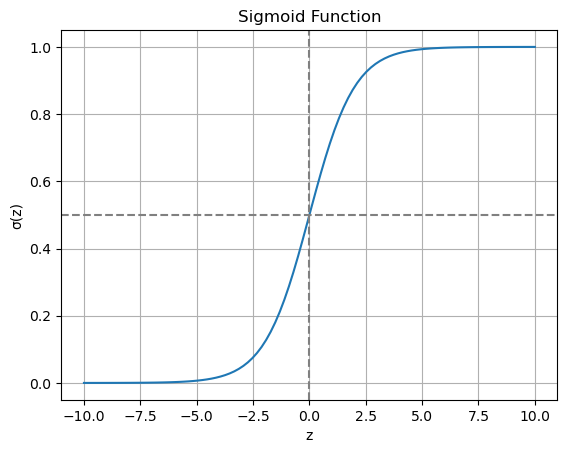

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plotting
z = np.linspace(-10, 10, 100)
sigma = sigmoid(z)

plt.plot(z, sigma)
plt.axvline(0, color='grey', linestyle='--')
plt.axhline(0.5, color='grey', linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()




## 1.5 Visualising the Decision Boundary

Suppose we plot two features of the data. Logistic regression tries to draw a line that separates the two classes:

- Class 0 (e.g. Not Spam)  
- Class 1 (e.g. Spam)  

It learns a decision boundary such that:

- Points on one side are classified as Class 0  
- Points on the other side are classified as Class 1  

The sigmoid function ensures a smooth transition across the boundary rather than a hard cutoff.


In the next section, we’ll build logistic regression from scratch and train it on synthetic data.

# 2. Logistic Regression: Mathematical Formulation and Implementation

## 2.1 Model Equation

Logistic regression models the probability that a binary outcome $y \in \{0, 1\}$ occurs given input features $x \in \mathbb{R}^n$.

The model computes a linear combination of inputs, then applies the sigmoid function:

$$
z = w \cdot x + b
$$

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Here:
- $w$ is the weight vector
- $b$ is the bias term
- $\hat{y}$ is the predicted probability that $y = 1$

## 2.2 Loss Function

To train the model, we minimise the binary cross-entropy loss:

$$
\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

This form arises from the principle of **maximum likelihood estimation** for Bernoulli-distributed outputs.

### Why use the log?

Logarithms help penalise confident but wrong predictions. Let's consider the two parts:

- When $y = 1$, we want $\hat{y}$ to be close to 1, so we minimise $-\log(\hat{y})$
- When $y = 0$, we want $\hat{y}$ to be close to 0, so we minimise $-\log(1 - \hat{y})$

Both components **sharply penalise wrong predictions** — especially when the model is confident but incorrect. This encourages the model to output probabilities close to the correct label.

Below is a plot showing what $-\log(p)$ looks like:

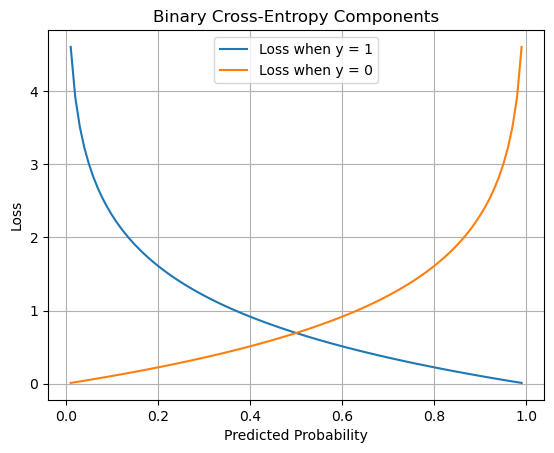

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)
loss_y1 = -np.log(p)
loss_y0 = -np.log(1 - p)

plt.plot(p, loss_y1, label='Loss when y = 1')
plt.plot(p, loss_y0, label='Loss when y = 0')
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Binary Cross-Entropy Components")
plt.legend()
plt.grid(True)
plt.show()

As shown:
- When $y = 1$, the loss is high when $\hat{y}$ is near 0, and lowest when $\hat{y} \to 1$
- When $y = 0$, the loss is high when $\hat{y}$ is near 1, and lowest when $\hat{y} \to 0$


### 2.2.1 What is Cross-Entropy Loss?

The cross-entropy loss comes from information theory. It measures the **distance between two probability distributions** — in our case:

- The true label distribution: $y \in \{0, 1\}$
- The predicted probability: $\hat{y} \in (0, 1)$ from the model

For binary classification, the cross-entropy loss for a single sample is:

$$
\ell(\hat{y}, y) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

This equation works for both cases:

- If $y = 1$, the loss is $- \log(\hat{y})$
- If $y = 0$, the loss is $- \log(1 - \hat{y})$

This structure means:

- The loss is **low** when the predicted probability is **close to the true label**
- The loss is **very high** when the model is **confident and wrong**

This makes cross-entropy ideal for classification — it encourages the model to assign **high probability to the correct class** while penalising incorrect certainty.

### Intuition:

- If the model is 90% confident the email is spam, and it *is* spam, the loss is small.
- But if the model is 90% confident it is *not* spam and it's wrong, the loss is large.

This asymmetric behaviour makes cross-entropy more sensitive to mistakes than simple squared error.

The full loss over $n$ samples is the average:

$$
\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

We minimise this loss to train logistic regression so that predicted probabilities align closely with the true labels.

## 2.3 Gradient Descent

To minimise the loss function, we use gradient descent to update the model parameters.

Since we include the bias term $b$ in the weight vector $w$ by appending a constant feature $x_0 = 1$ to every input, the model becomes:

$$
\hat{y} = \sigma(w^\top x)
$$

The gradient of the binary cross-entropy loss with respect to $w$ is:

$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} X^\top (\hat{y} - y)
$$

where $X$ is the augmented input matrix (i.e., with a leading column of ones).

This yields the gradient update rule:

$$
w \leftarrow w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}
$$

### 2.3.1 Comparison to Linear Regression

In linear regression, the model uses:

$$
\hat{y} = w^\top x
$$

and minimises mean squared error:

$$
\mathcal{L}_{\text{linear}} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2
$$

The key differences are:

- Logistic regression applies a non-linear sigmoid function to model probabilities
- Logistic regression uses binary cross-entropy loss, which penalises incorrect and overconfident predictions more heavily

Despite these differences, the gradient update step remains structurally the same: compute the gradient and move in the direction that reduces the loss.

## 2.4 Logistic Regression Implementation from Scratch

In this implementation, we treat the bias term $b$ as part of the weight vector $w$ by introducing a fixed input feature $x_0 = 1$. This gives the model the form:

$$
\hat{y} = \sigma(w^\top x)
$$

where $x$ includes a leading 1 for the bias term, and $w$ includes $w_0$ as the bias weight.

To train the model, we minimise the binary cross-entropy loss using gradient descent. The gradient of the loss with respect to the weights is:

$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} X^\top (\hat{y} - y)
$$

where $X$ is the augmented feature matrix with a leading column of ones, $\hat{y}$ are the predicted probabilities, and $y$ are the true labels.

The gradient descent update rule is then:

$$
w \leftarrow w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}
$$

We implement this in NumPy as follows:

In [3]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    eps = 1e-8  # avoid log(0)
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

def predict_proba(X_aug, w):
    return sigmoid(np.dot(X_aug, w))

def predict(X_aug, w, threshold=0.5):
    return (predict_proba(X_aug, w) >= threshold).astype(int)

def train(X, y, lr=0.1, epochs=100):
    n_samples, n_features = X.shape
    X_aug = np.hstack([np.ones((n_samples, 1)), X])  # add bias feature x0 = 1
    w = np.zeros(n_features + 1)  # includes w0 for bias
    losses = []

    for epoch in range(epochs):
        y_hat = predict_proba(X_aug, w)
        loss = compute_loss(y, y_hat)
        losses.append(loss)
        grad = np.dot(X_aug.T, (y_hat - y)) / n_samples
        w -= lr * grad

    return w, losses

# 3. Training and Visualisation

## 3.1 Generate Synthetic Data

We will now create a 2D synthetic dataset suitable for binary classification, train our logistic regression model on it, and visualise the results.


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create binary classification data with 2 informative features
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2 Training and Loss Plotting

We now train our logistic regression model using the `train` function we implemented earlier. We'll also visualise how the loss decreases over time.


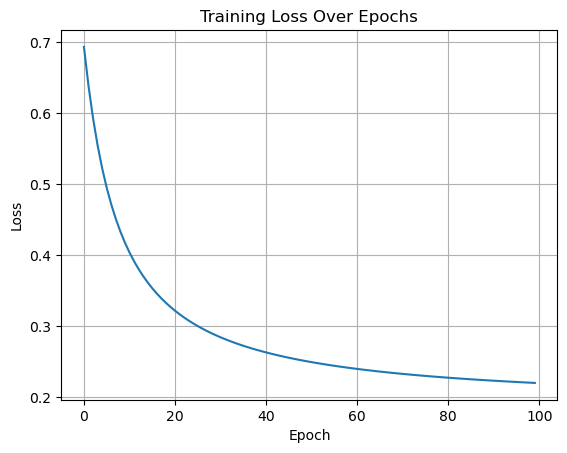

In [5]:
# Train the model
w, losses = train(X_train, y_train, lr=0.1, epochs=100)

# Plot training loss
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

## 3.3 Visualising the Decision Boundary

To understand how the logistic regression model separates the two classes, we can plot the decision boundary in the 2D feature space.

We apply the model to a grid of points and classify each one to show which regions of the space belong to class 0 or class 1.


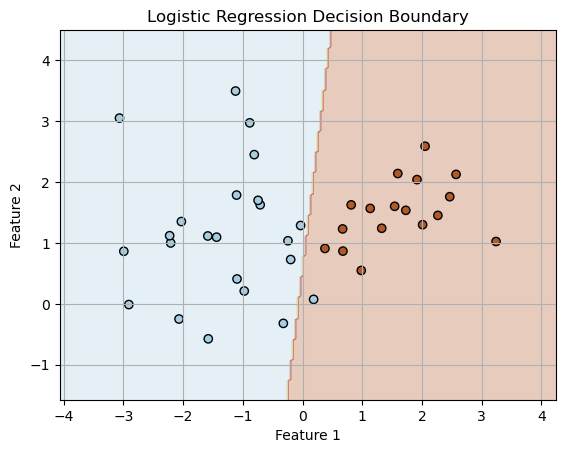

In [6]:
def plot_decision_boundary(X, y, w):
    # Add bias column to input data
    X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Flatten the grid and augment with bias term
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_aug = np.hstack([np.ones((grid.shape[0], 1)), grid])
    
    # Predict class for each point in the grid
    Z = predict(grid_aug, w).reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Plot decision boundary on validation set
plot_decision_boundary(X_val, y_val, w)

# 4. Evaluating Model Performance

## 4.1 Accuracy and Confusion Matrix

After training, we evaluate the model's performance using common classification metrics. We'll compute the **accuracy** and display the **confusion matrix**.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Augment validation data with bias feature
X_val_aug = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

# Predict labels
y_pred = predict(X_val_aug, w)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.975
Confusion Matrix:
[[22  1]
 [ 0 17]]


The confusion matrix shows the breakdown of correct and incorrect predictions:
- True positives: model correctly predicted class 1
- True negatives: model correctly predicted class 0
- False positives: model predicted class 1 but it’s actually 0
- False negatives: model predicted class 0 but it’s actually 1

Accuracy gives the overall proportion of correct predictions.

### 4.2 Probability Scores and Thresholds

Since logistic regression outputs probabilities, we can also explore how changing the decision threshold affects predictions.

In [9]:
# Predict probabilities instead of labels
probs = predict_proba(X_val_aug, w)

# Use a custom threshold
threshold = 0.7
y_pred_thresh = (probs >= threshold).astype(int)

# Recalculate accuracy
acc_thresh = accuracy_score(y_val, y_pred_thresh)
print(f"Accuracy with threshold {threshold}: {acc_thresh:.3f}")

Accuracy with threshold 0.7: 0.975


Adjusting the threshold allows you to control the trade-off between false positives and false negatives, which is useful in applications like fraud detection or medical diagnosis.

# 5. Regularisation in Logistic Regression

## 5.1 Why Regularisation?

Just like in linear regression, logistic regression can overfit when the model tries too hard to separate noisy data, especially in high-dimensional feature spaces.

Regularisation helps by discouraging large weights, which can lead to overconfident and brittle predictions.


## 5.2 Regularised Loss Function

In logistic regression, regularisation is applied to the weights in the same way as in linear regression — **added to the loss function**.

For **L2 regularisation (Ridge)**, the regularised loss becomes:

$$
\mathcal{L}_{\text{reg}} = \mathcal{L}_{\text{cross-entropy}} + \lambda \|w\|^2
$$

For **L1 regularisation (Lasso)**:

$$
\mathcal{L}_{\text{reg}} = \mathcal{L}_{\text{cross-entropy}} + \lambda \|w\|_1
$$

Note: the bias term $w_0$ is typically excluded from regularisation.


## 5.3 Gradient Update with L2 Regularisation

The only change in the gradient is an added penalty term:

$$
\frac{\partial \mathcal{L}_{\text{reg}}}{\partial w} = \frac{1}{n} X^\top (\hat{y} - y) + 2\lambda w
$$

So the update becomes:

$$
w \leftarrow w - \eta \left( \frac{1}{n} X^\top (\hat{y} - y) + 2\lambda w \right)
$$


## 5.4 Implementation Difference

To implement L2 regularisation in our code from Section 2.4, we modify the gradient step like this:


In [10]:
def train_with_l2(X, y, lr=0.1, epochs=100, lam=0.01):
    n_samples, n_features = X.shape
    X_aug = np.hstack([np.ones((n_samples, 1)), X])
    w = np.zeros(n_features + 1)
    losses = []

    for epoch in range(epochs):
        y_hat = predict_proba(X_aug, w)
        loss = compute_loss(y, y_hat) + lam * np.sum(w[1:] ** 2)  # exclude bias from penalty
        losses.append(loss)
        grad = np.dot(X_aug.T, (y_hat - y)) / n_samples
        grad[1:] += 2 * lam * w[1:]  # regularise all but the bias term
        w -= lr * grad

    return w, losses

The core difference from linear regression is in the loss function and the use of the sigmoid output — otherwise, the structure of regularisation and gradient updates is the same.